In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr

import wrangle as w

opening data from local file


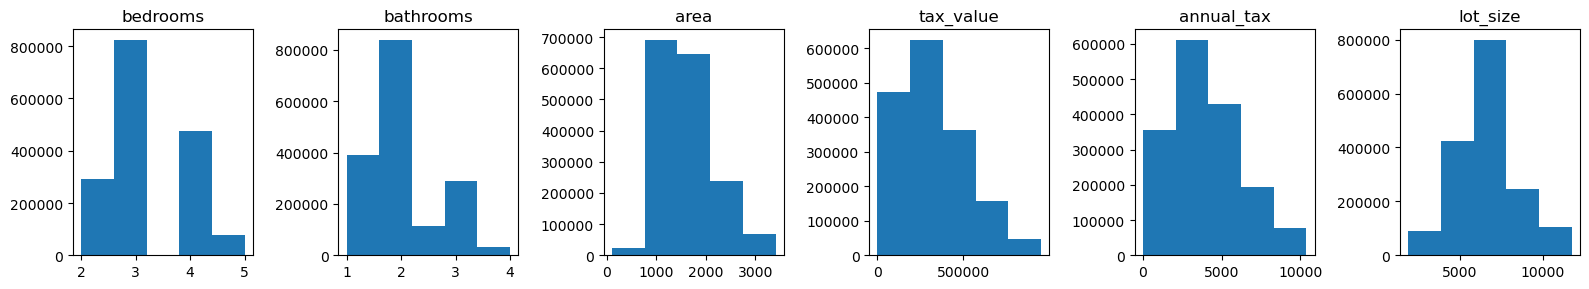

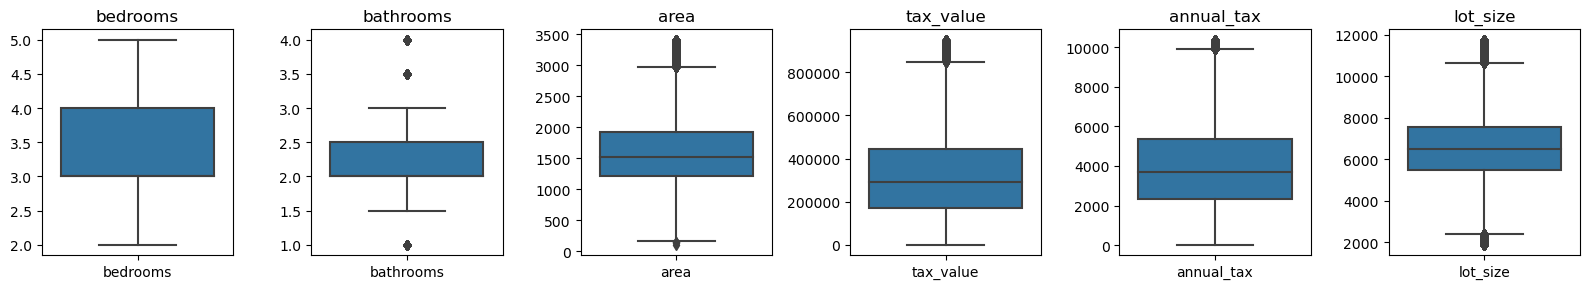

In [2]:
train, validate, test = w.wrangle_zillow()

In [3]:
df = w.acquire_zillow_sfr()

opening data from local file


In [4]:
df.isna().sum()

bedrooms         11
bathrooms        11
area           8484
tax_value       493
year_built     9337
annual_tax     4442
fips              0
lot_size      13438
dtype: int64

In [5]:
len(df[df.lot_size > 100000])

14119

<AxesSubplot:>

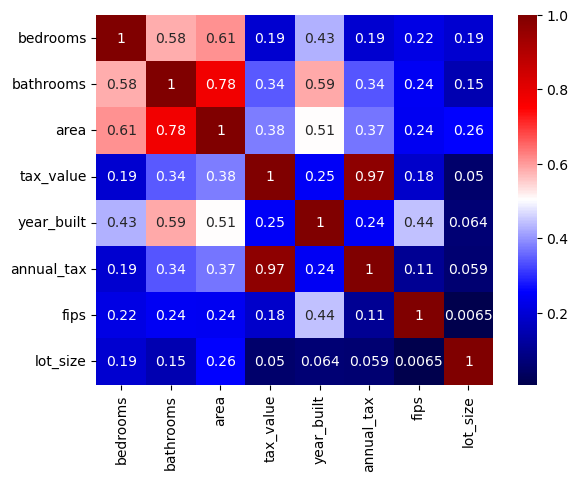

In [59]:
sns.heatmap(train.corr(method='spearman'), cmap='seismic', annot=True)

In [73]:
df.shape

(2152863, 8)

In [8]:
# def plot_variable_pairs(df, ):

IndentationError: expected an indented block (766860278.py, line 1)

In [ ]:
# df = df[df.lot_size < 100000]

In [10]:
vis_sample = train.sample(1000)

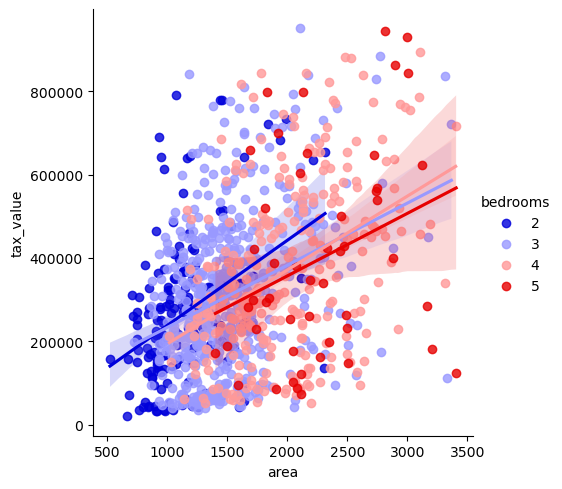

In [60]:
sns.lmplot(data=vis_sample,
           x='area',
           y='tax_value',
           hue='bedrooms',
           scatter=True,
           palette='seismic')
plt.show()

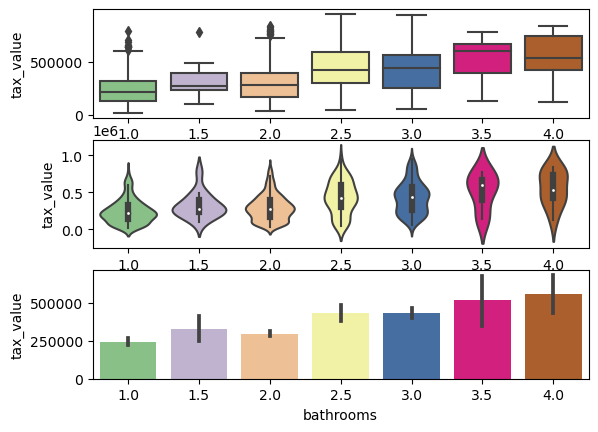

In [62]:
plt.subplot(311)
sns.boxplot(x='bathrooms', y='tax_value', data=vis_sample, palette='Accent')
plt.subplot(312)
sns.violinplot(x='bathrooms', y='tax_value', data=vis_sample, palette='Accent')
plt.subplot(313)
sns.barplot(x='bathrooms', y='tax_value', data=vis_sample, palette='Accent')
plt.show()

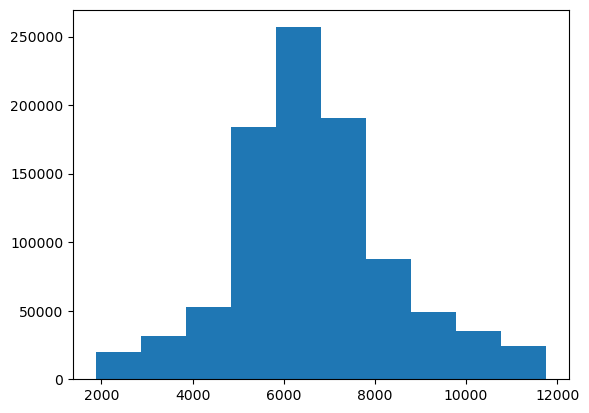

In [32]:
plt.hist(data=train,
         x='lot_size')
plt.show()

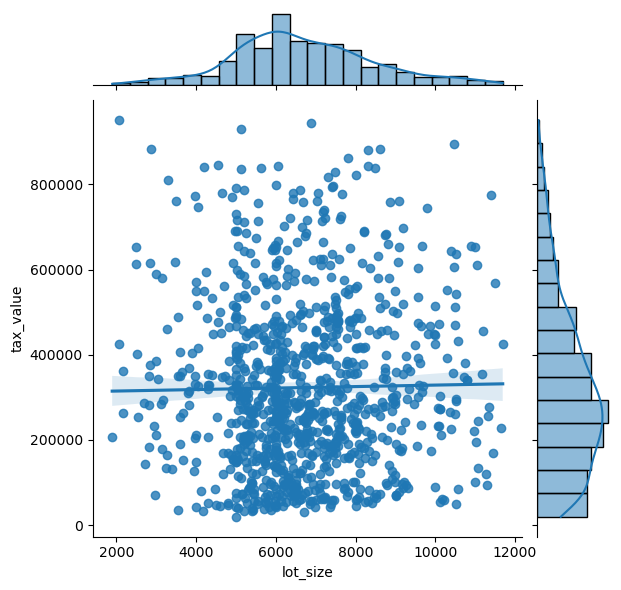

In [66]:
sns.jointplot(x="lot_size", y="tax_value", data=vis_sample,  kind='reg')
plt.show()

In [75]:
#check stats test if there is a correlation between lot_size and tax_value
# h_0 there is no correlation
# h_a there is a correlation

r, p_value = pearsonr(train.lot_size, train.tax_value)
print(f'P-value: {p_value} \nCorrelation Coefficient: {r}')

P-value: 0.0 
Correlation Coefficient: 0.05380524851667597


In [74]:
(1855276 / 2152863) - (1665830 / 2152863)

0.087997239025428

In [28]:
br_1 = train[train.bedrooms == 1]
br_2 = train[train.bedrooms == 2]
br_3 = train[train.bedrooms == 3]
br_4 = train[train.bedrooms == 4]
br_5 = train[train.bedrooms == 5]

In [34]:
train[train.bedrooms == 2]

,bedrooms,bathrooms,area,tax_value,year_built,annual_tax,fips,lot_size
373459,2,1.0,781,45197,1940,908.93,6037,4500
1023990,2,1.0,1209,273316,1950,3394.68,6037,8506
80600,2,1.0,734,179783,1940,2740.34,6037,7006
1424831,2,1.0,1320,331369,1910,4511.39,6037,6793
1027196,2,1.0,560,249576,1924,2766.20,6037,3688
...,...,...,...,...,...,...,...,...
750958,2,2.0,1280,242529,1972,3138.72,6059,8160
815349,2,1.0,2441,888910,1951,10291.56,6059,5450
1242290,2,1.0,1111,212916,1914,2683.85,6037,3960
1646292,2,1.0,931,864362,1961,9546.24,6059,2600


In [31]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,annual_tax,fips,lot_size
1491815,4,3.0,2426,390185,1990,5185.10,6037,5005
71144,3,1.0,1109,54621,1941,985.74,6037,10106
373459,2,1.0,781,45197,1940,908.93,6037,4500
1783094,4,3.0,2649,466220,1968,5807.45,6037,8864
394800,3,2.0,2187,563000,1947,6495.88,6037,10295


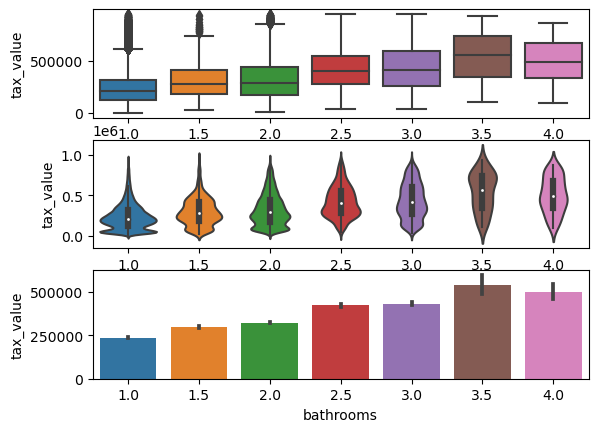

In [35]:
plt.subplot(311)
sns.boxplot(x='bathrooms', y='tax_value', data=br_2)
plt.subplot(312)
sns.violinplot(x='bathrooms', y='tax_value', data=br_2)
plt.subplot(313)
sns.barplot(x='bathrooms', y='tax_value', data=br_2)
plt.show()

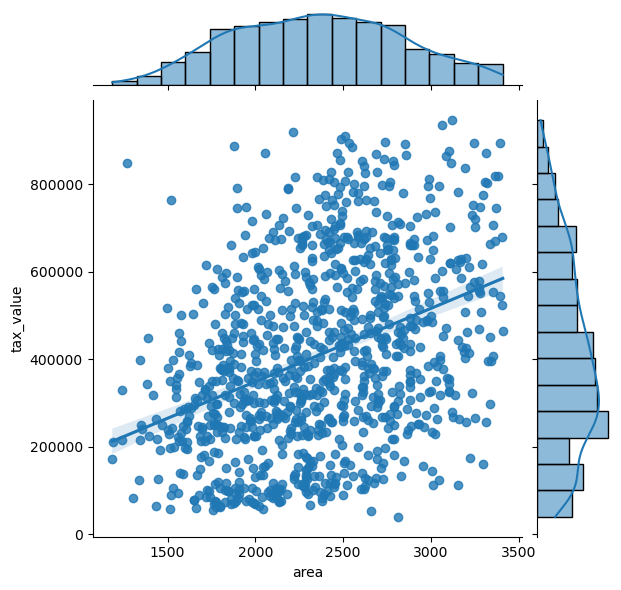

In [41]:
sns.jointplot(x="area", y="tax_value", data=br_5.sample(1000),  kind='reg')
plt.show()

# 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [71]:
def plot_variable_pairs(df):
    sample = df.sample(1000)
    sns.pairplot(sample, corner=True, kind='reg', plot_kws={'color': 'red'})
    plt.show()

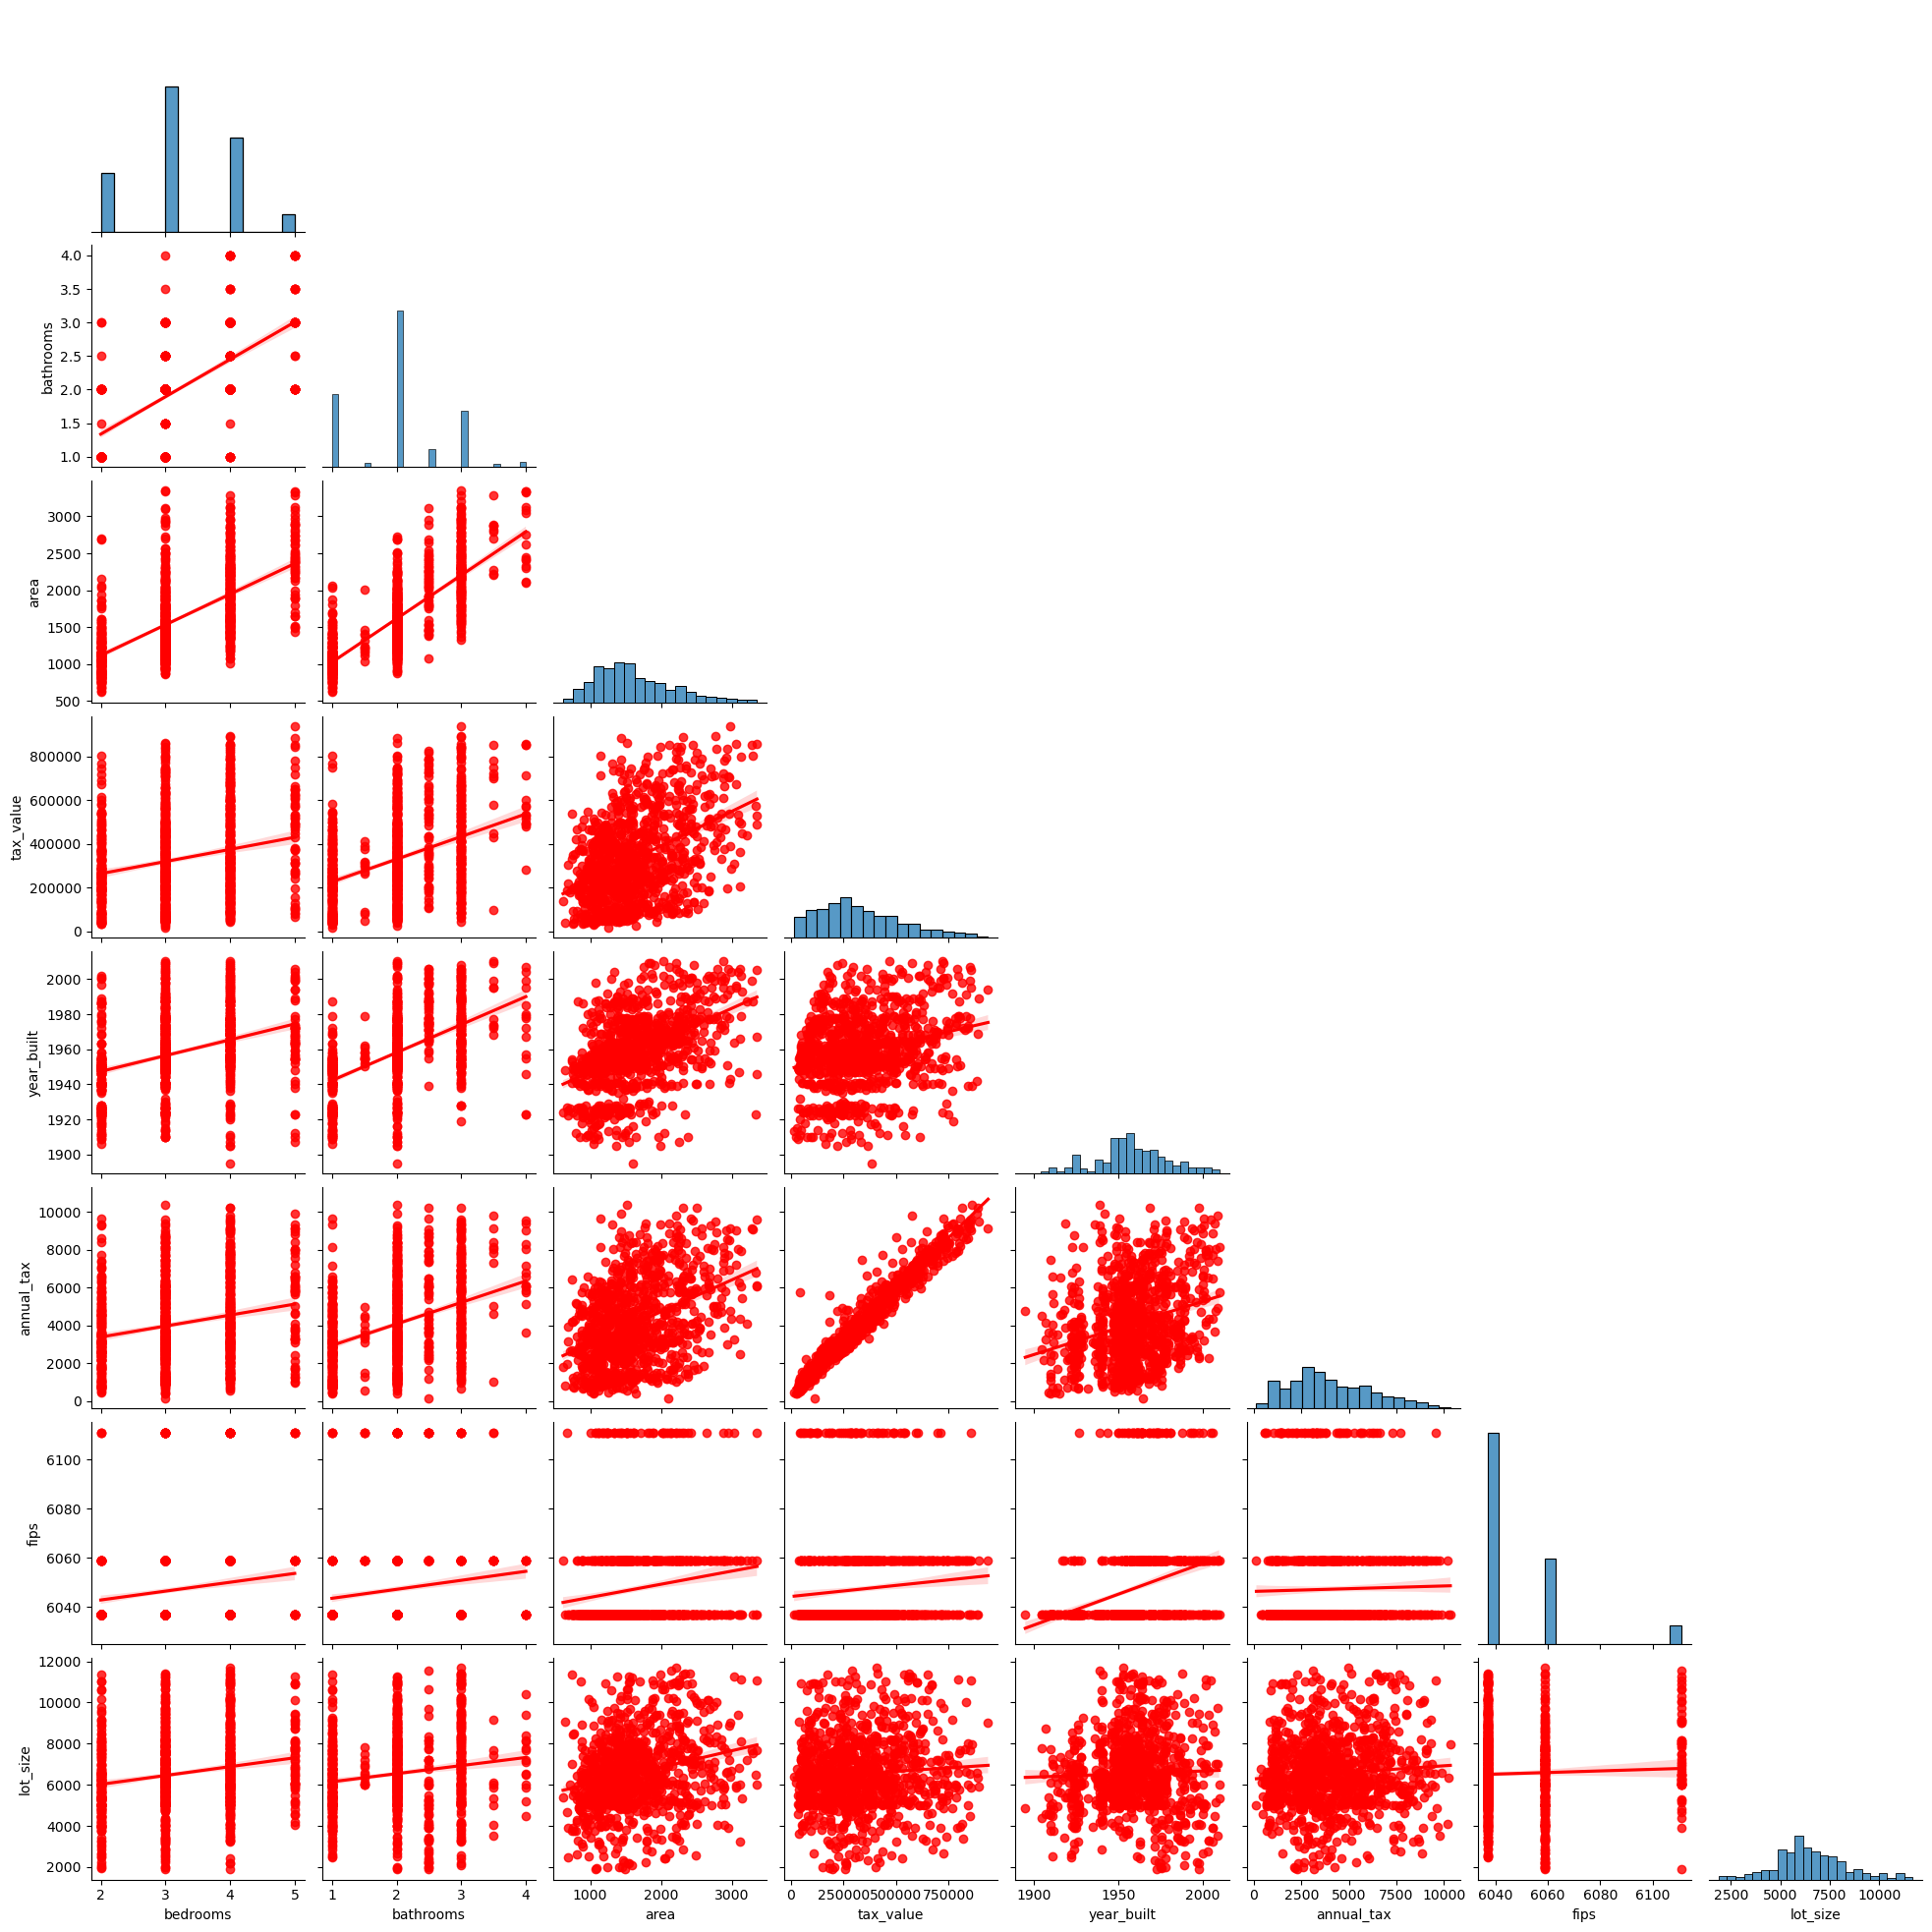

In [72]:
plot_variable_pairs(train)